In [2]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import time
import os

In [2]:
ls

176-01-bikelocations.csv
176-01-ind_dublinalt.csv
176-01-ind_dublinalt.csv.gz
176-01-sum_dublinalt.csv
2008 machine learning correlations.ipynb
2008 machine learning start-Copy1.ipynb
2008 machine learning start-Copy2.ipynb
2008 machine learning start.ipynb
2017-06.csv
2017-06.ipynb
2017-06_features.csv
2017-06_features_complete.csv
2018-06-20.csv
2018-06-20.ipynb
2018-06-20_features.csv
PORTOBELLO ROAD.csv
all-station-features-march_on.ipynb
all-station-features-march_on.py
all-station-features.ipynb
bikes_2018.csv
f_features.csv
features2.csv
features_ready.csv
fulldata-spoken.ipynb
knn for neil.ipynb
machinestarts-2years_all stations.ipynb
machinestarts.ipynb
machinestarts2.ipynb
pboh-features.ipynb
pboh.ipynb
scattered.ipynb
testthemodel.csv
time_series_features.csv


In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#headers = ['tfl_id','bikes','spaces','total_docks','timestamp']

In [43]:
#The reason I am not using the parameters parse_dates=True, index_col='timestamp' is because I need to 
#sort the values by tfl_id and timestamp to create the necessary features
#df = pd.read_csv("2018-06-20.csv", parse_dates=True, index_col='timestamp')

df = pd.read_csv("2018-06-20.csv")

In [8]:
# Reduce the precision of numbers - so that it is easy to read
pd.set_option('precision', 0)

In [32]:
df.head(2)

,tfl_id,bikes,spaces,total_docks
timestamp,,,,
2018-06-20 00:00:03,42,24,6,30
2018-06-20 00:00:03,30,2,18,20


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681380 entries, 0 to 681379
Data columns (total 5 columns):
timestamp      681380 non-null object
tfl_id         681380 non-null int64
bikes          681380 non-null int64
spaces         681380 non-null int64
total_docks    681380 non-null int64
dtypes: int64(4), object(1)
memory usage: 26.0+ MB


In [10]:
df.describe()

,tfl_id,bikes,spaces,total_docks
count,681380,681380,681380,681380
mean,56,11,20,32
std,32,11,12,8
min,1,0,0,16
25%,29,1,11,29
50%,56,7,20,30
75%,83,19,30,40
max,112,40,42,40


In [44]:
df = df.sort_values(by=['tfl_id','timestamp'])

In [46]:
df['deposit'] = df['bikes'].diff()

In [40]:
df['deposit'] = df['deposit'].fillna(0).astype(int)

In [ ]:
df['deposit_2'] = df['bikes'].diff(periods=2)

In [78]:
df['deposit_lag'] = df['bikes'].shift()

In [81]:
df['deposit_flag'] = df['deposit'] > 5

In [6]:
df['deposit_flag_2'] = df['deposit_2'] > 11

In [82]:
df['deposit_flag'] = df['deposit_flag'].fillna(0).astype(int)

In [158]:
#df = df.fillna(0)

In [7]:
df['deposit_flag_2'] = df['deposit_flag_2'].fillna(0).astype(int)

In [154]:
df['deposit'] = df['deposit'].fillna(0).astype(int)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 681380 entries, 2018-06-20 00:00:03 to 2018-06-28 16:46:02
Data columns (total 9 columns):
tfl_id            681380 non-null int64
bikes             681380 non-null int64
spaces            681380 non-null int64
total_docks       681380 non-null int64
deposit           681380 non-null int64
deposit_2         681380 non-null int64
deposit_lag       681380 non-null int64
deposit_flag      681380 non-null int64
deposit_flag_2    681380 non-null int64
dtypes: int64(9)
memory usage: 72.0 MB


In [23]:
df['deposit'] = df['deposit'].fillna(0).astype(int)
df['deposit_2'] = df['deposit_2'].fillna(0).astype(int)
df['deposit_lag'] = df['deposit_lag'].fillna(0).astype(int)
df['deposit_flag'] = df['deposit_flag'].fillna(0).astype(int)

In [89]:
df = df.sort_values(by=['timestamp'])

In [90]:
df.set_index('timestamp')

,tfl_id,bikes,spaces,total_docks,deposit,deposit_2,deposit_lag,deposit_flag
timestamp,,,,,,,,
2018-06-20 00:00:03,1,0,31,31,0,0,0,0
2018-06-20 00:00:03,95,40,0,40,39,39,1,1
2018-06-20 00:00:03,16,1,19,20,0,1,1,0
2018-06-20 00:00:03,94,40,0,40,28,28,12,1
2018-06-20 00:00:03,17,1,19,20,-17,-16,18,0
2018-06-20 00:00:03,93,40,0,40,33,33,7,1
2018-06-20 00:00:03,18,22,8,30,20,19,2,1
2018-06-20 00:00:03,92,40,0,40,13,14,27,1
2018-06-20 00:00:03,19,0,30,30,-6,-6,6,0


In [118]:
df.to_csv('2018-06-20_features.csv', index=False)

In [135]:
df.to_csv('2018-06-20_features_test.csv', index=True)


In [129]:
df = df.drop('Unnamed: 0', axis=1)

In [8]:
df.to_csv('2018-06-20_features2_test.csv', index=True)



In [4]:
df = pd.read_csv('2018-06-20_features2_test.csv', parse_dates=True, index_col='timestamp')

In [9]:
df.head(2)

,tfl_id,bikes,spaces,total_docks,deposit,deposit_2,deposit_lag,deposit_flag,deposit_flag_2
timestamp,,,,,,,,,
2018-06-20 00:00:03,1,0,31,31,0.0,0,0,0,0
2018-06-20 00:00:03,95,40,0,40,39.0,39,1,1,1


In [10]:
df.dtypes

tfl_id              int64
bikes               int64
spaces              int64
total_docks         int64
deposit           float64
deposit_2           int64
deposit_lag         int64
deposit_flag        int64
deposit_flag_2      int64
dtype: object

In [156]:
df.shape

(681380, 9)

In [100]:
pd.unique(df['tfl_id'])

array([  1,  95,  16,  94,  17,  93,  18,  92,  19,  91,  21,  89,  22,
        88,  87,  23,  86,  24,  85,  25,  84,  26,  83,  27,  15,  82,
        96,  14,   3, 110,   4, 108,   5, 107,   6, 106,   7, 105, 104,
         8, 103,   9, 102,  10, 101,  11, 100,  12,  99,  13,  98,  97,
         2,  28,  29,  42,  65,  43,  64,  63,  44,  62,  45,  61,  46,
        60,  47,  59,  48,  58,  49,  57,  50,  56,  55,  51,  54,  52,
        66,  81,  41,  40,  80,  79,  30,  78,  31,  77,  32,  76,  33,
        75,  34,  74,  35,  73,  36,  72,  71,  37,  70,  38,  69,  39,
        68,  67, 112,  53, 111])

In [24]:
df_pboh = df[(df['tfl_id']==43)]

In [25]:
df_pboh.head(2)

,tfl_id,bikes,spaces,total_docks,deposit,deposit_2,deposit_lag,deposit_flag,deposit_flag_2
timestamp,,,,,,,,,
2018-06-20 00:00:03,43,29,1,30,29,28,0,1,1
2018-06-20 00:02:02,43,29,1,30,0,29,29,0,1


In [15]:
#df_pboh = df_pboh.set_index('timestamp')

In [16]:
dfSums = df.groupby(['tfl_id']).sum()

In [17]:
dfSums.tail()

,bikes,spaces,total_docks,deposit,deposit_2,deposit_lag,deposit_flag,deposit_flag_2
tfl_id,,,,,,,,
107,66022,183057,250200,2.0,4,66020,1,2
108,42588,207283,250200,5.0,10,42583,1,0
110,37010,213122,250200,0.0,0,37010,5,1
111,58598,151294,233600,-8.0,-16,58606,13,2
112,89192,98046,187650,2.0,5,89190,5,4


In [165]:
#dfSums.sort_values(by=['deposit_flag'], ascending=False)

In [144]:
len(pd.unique(df['tfl_id']))

109

In [166]:
%matplotlib inline

In [18]:
# Set some parameters to get good visuals - style to ggplot and size to 15,10
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

In [ ]:
# Plot the Data
df_pboh.plot(kind ="barh", x = df_pboh.index, y = 'bikes')

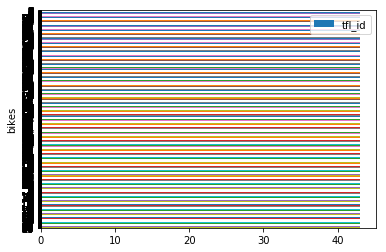

In [ ]:
# Plot the Data
df_pboh.plot(kind ="barh", x = 'bikes', y = 'tfl_id')

In [28]:
df_pboh['hourVal'] = pd.DatetimeIndex(df_pboh.index).hour

/Users/neil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
df_pboh['dayVal'] = pd.DatetimeIndex(df_pboh.index).day

/Users/neil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
df_pboh.index = pd.PeriodIndex(df_pboh.index, freq='H')

In [30]:
df_pboh.head(2)

,tfl_id,bikes,spaces,total_docks,deposit,deposit_2,deposit_lag,deposit_flag,deposit_flag_2,hourVal,dayVal
timestamp,,,,,,,,,,,
2018-06-20 00:00:03,43,29,1,30,29,28,0,1,1,0,20
2018-06-20 00:02:02,43,29,1,30,0,29,29,0,1,0,20


In [40]:
df_pboh['dayofweekVal'] = pd.DatetimeIndex(df_pboh.index).dayofweek

/Users/neil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
df_pbohPivot = pd.pivot_table(df_pboh, values = "bikes", 
                             columns = "dayofweekVal", index = "hourVal")

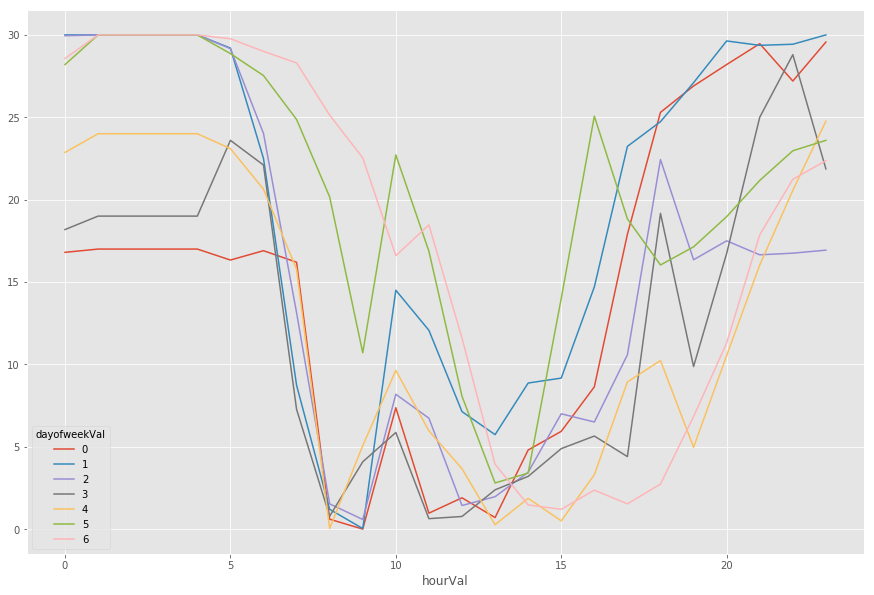

In [43]:
df_pbohPivot.plot()

In [31]:
df_pbohPivot = pd.pivot_table(df_pboh, values = "bikes", 
                             columns = "dayVal", index = "hourVal")

In [32]:
df_pbohPivot

dayVal,20,21,22,23,24,25,26,27,28
hourVal,,,,,,,,,
0,29.900000,7.166667,22.866667,28.200000,28.566667,16.800000,30.000000,30.000000,29.200000
1,30.000000,8.000000,24.000000,30.000000,30.000000,17.000000,30.000000,30.000000,30.000000
2,30.000000,8.000000,24.000000,30.000000,30.000000,17.000000,30.000000,30.000000,30.000000
3,30.000000,8.000000,24.000000,30.000000,30.000000,17.000000,30.000000,30.000000,30.000000
4,30.000000,8.000000,24.000000,30.000000,30.000000,17.000000,30.000000,30.000000,30.000000
5,28.866667,17.566667,23.100000,28.866667,29.766667,16.333333,29.200000,29.466667,29.633333
6,22.666667,19.266667,20.633333,27.533333,29.000000,16.900000,22.500000,25.366667,24.933333
7,13.833333,4.200000,15.766667,24.866667,28.300000,16.200000,8.733333,12.433333,10.333333
8,0.500000,0.033333,0.033333,20.166667,25.133333,0.600000,1.200000,2.566667,1.533333


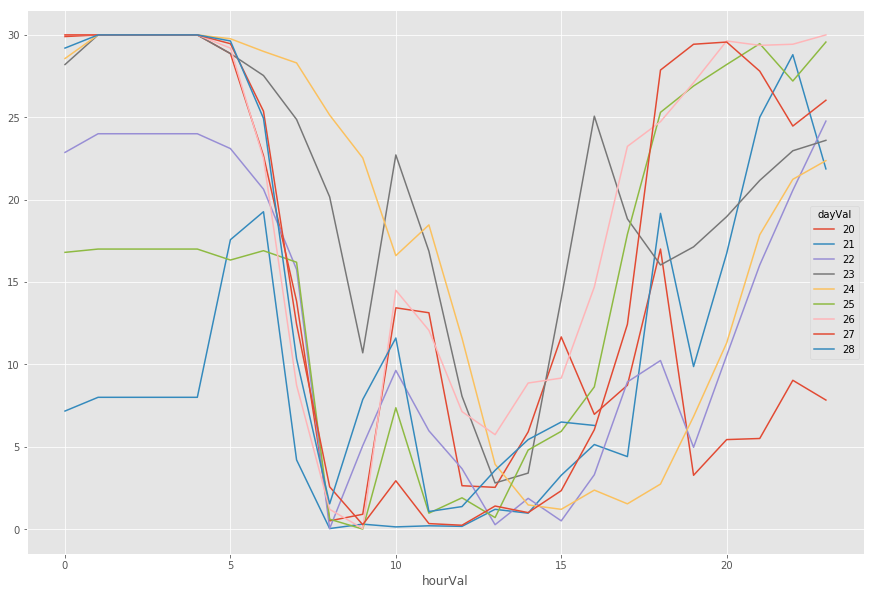

In [33]:
df_pbohPivot.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1170024e0>,
      dtype=object)

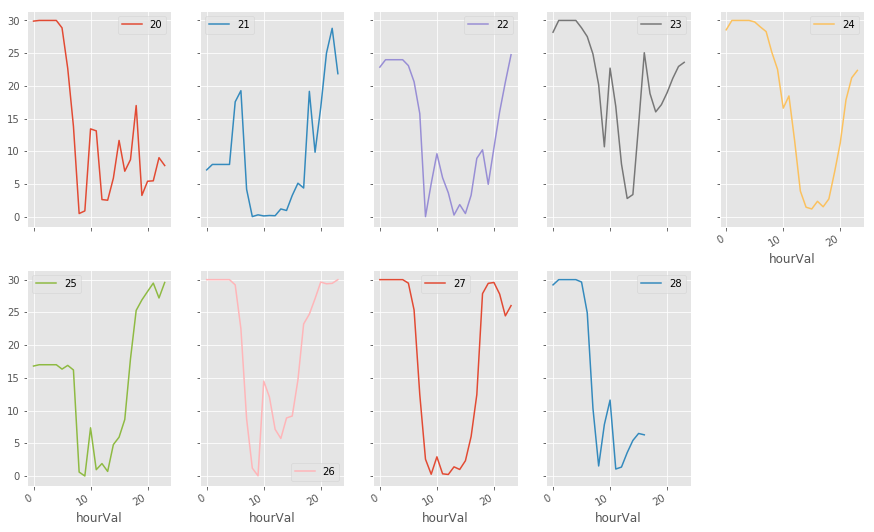

In [39]:
df_pbohPivot.plot(subplots = True, figsize=(15, 15), layout=(3, 5), sharey=True)

In [38]:
df_pbohPivot_spaces = pd.pivot_table(df_pboh, values = "spaces", 
                             columns = "dayVal", index = "hourVal")

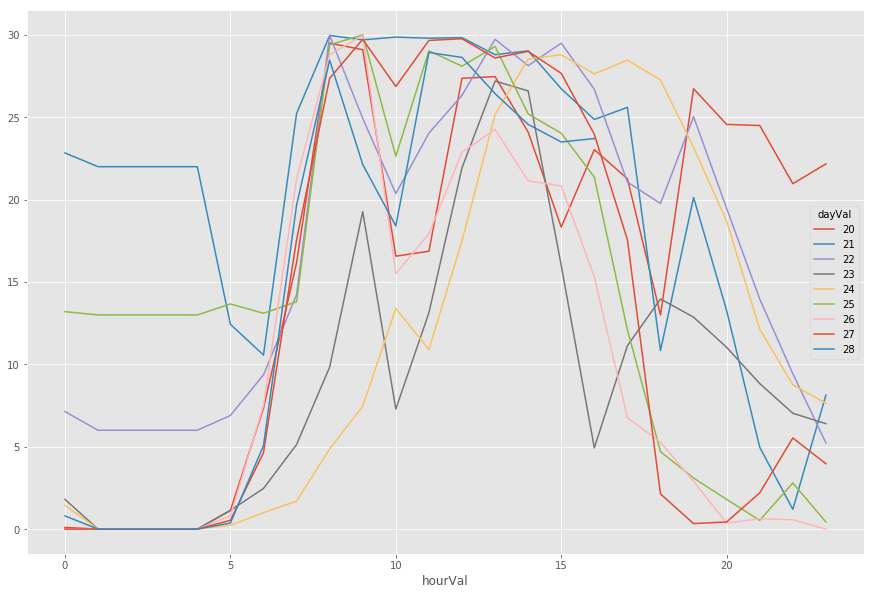

In [35]:
df_pbohPivot_spaces.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1127672b0>,
      dtype=object)

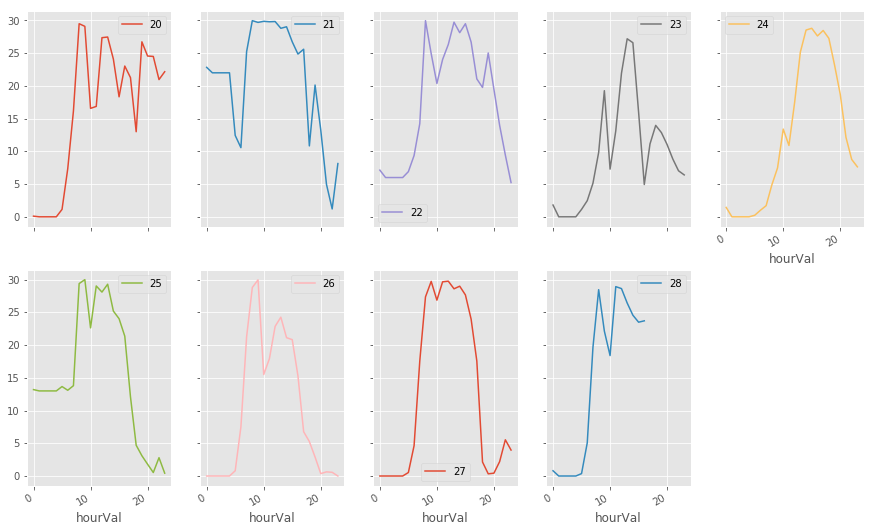

In [36]:
df_pbohPivot_spaces.plot(subplots = True, figsize=(15, 15), layout=(3, 5), sharey=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(df_2_year.drop('deposit_flag', axis=1))

In [ ]:
scaled_features = scaler.transform(df_2_year.drop('deposit_flag', axis=1))

In [ ]:
df_feat = pd.DataFrame(scaled_features, columns=df_2_year.columns[:-1])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [ ]:
X = df_feat
y = df_2_year['deposit_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train, y_train)

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [ ]:
mdl = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)

In [ ]:
mdl.fit(X_train, y_train)

In [ ]:
mdl_pred = mdl.predict(X_test)

NameError: name 'mdl' is not defined

In [ ]:
#df_2_year['deposit_lag'] = df_2_year['bikes'].shift().fillna(0).astype(int)

In [ ]:
#df_2_year['deposit'] = df_2_year['bikes'].diff().fillna(0).astype(int)

In [8]:
df['month'] = df.index.map(lambda x: x.strftime('%-m'))

In [9]:
df['day'] = df.index.map(lambda x: x.strftime('%d'))

In [10]:
df['weekday'] = df.index.map(lambda x: x.strftime('%w'))

In [11]:
df['hour'] = df.index.map(lambda x: x.strftime('%-H'))

In [12]:
df['Minute'] = df.index.map(lambda x: x.strftime('%-M'))

In [13]:
#df['AMPM'] = df.index.map(lambda x: x.strftime('%p'))

In [14]:
df['dayofyear'] = df.index.map(lambda x: x.strftime('%j'))

In [15]:
df['weeknumber'] = df.index.map(lambda x: x.strftime('%W'))

In [16]:
df.tail()

,tfl_id,bikes,spaces,total_docks,month,day,weekday,hour,Minute,dayofyear,weeknumber
timestamp,,,,,,,,,,,
2018-06-28 16:38:02,43,7,23,30,6,28,4,16,38,179,26
2018-06-28 16:40:02,43,6,24,30,6,28,4,16,40,179,26
2018-06-28 16:42:03,43,8,22,30,6,28,4,16,42,179,26
2018-06-28 16:44:02,43,8,22,30,6,28,4,16,44,179,26
2018-06-28 16:46:02,43,8,22,30,6,28,4,16,46,179,26


In [17]:
df.to_csv('f_features.csv')

In [18]:
ls


176-01-bikelocations.csv     features_ready.csv
176-01-ind_dublinalt.csv     fulldata-spoken.ipynb
176-01-ind_dublinalt.csv.gz  knn for neil.ipynb
176-01-sum_dublinalt.csv     machinestarts.ipynb
PORTOBELLO ROAD.csv          pboh-features.ipynb
f_features.csv               pboh.ipynb


In [19]:
df = pd.read_csv('f_features.csv')

In [20]:
df['withdrawal'] = df['bikes'].diff().fillna(0)

In [21]:
df['withdrawal_flag'] = df['bikes'].diff().fillna(0).astype(int) > 6

In [22]:
# you cannot spell 
df['deposit'] = df['spaces'].diff().fillna(0)

In [23]:
#this needs to be a bit smarter. when the station was created there was a deposit of 27 bikes! 
#so its valid but not what we are looking for
df['deposit_flag'] = df['spaces'].diff().fillna(0) > 6

In [77]:
#df[df['withdrawal'] == True]

In [81]:
#df[df['despos'] == True]

In [94]:
#df.drop(['desposit'], axis = 1, inplace = True)

In [24]:
df['deposit_flag'] = df['deposit_flag'].astype(int)

In [25]:
df['withdrawal_flag'] = df['withdrawal_flag'].astype(int)

In [26]:
#df.to_csv('features_ready.csv')

In [27]:
df.tail(2)

,timestamp,tfl_id,bikes,spaces,total_docks,month,day,weekday,hour,Minute,dayofyear,weeknumber,withdrawal,withdrawal_flag,deposit,deposit_flag
1136826,2018-06-28 16:38:02,43,7,23,30,6,28,4,16,38,179,26,0.0,0,0.0,0
1136827,2018-06-28 16:40:02,43,6,24,30,6,28,4,16,40,179,26,-1.0,0,1.0,0
1136828,2018-06-28 16:42:03,43,8,22,30,6,28,4,16,42,179,26,2.0,0,-2.0,0
1136829,2018-06-28 16:44:02,43,8,22,30,6,28,4,16,44,179,26,0.0,0,0.0,0
1136830,2018-06-28 16:46:02,43,8,22,30,6,28,4,16,46,179,26,0.0,0,0.0,0


In [28]:
df2 = df

In [29]:
df2.drop(['deposit'], axis = 1, inplace = True)

In [30]:
df2.drop(['tfl_id'], axis = 1, inplace = True)

In [31]:
df2.drop(['total_docks'], axis = 1, inplace = True)

In [32]:
df2.drop(['withdrawal'], axis = 1, inplace = True)

In [33]:
df2.head()

,timestamp,bikes,spaces,month,day,weekday,hour,Minute,dayofyear,weeknumber,withdrawal_flag,deposit_flag
0,2011-03-02 06:20:02,0,0,3,2,3,6,20,61,9,0,0
1,2011-03-02 06:30:01,3,27,3,2,3,6,30,61,9,0,1
2,2011-03-02 06:40:02,3,27,3,2,3,6,40,61,9,0,0
3,2011-03-02 06:50:01,3,27,3,2,3,6,50,61,9,0,0
4,2011-03-02 07:00:03,3,27,3,2,3,7,0,61,9,0,0


In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136831 entries, 0 to 1136830
Data columns (total 12 columns):
timestamp          1136831 non-null object
bikes              1136831 non-null int64
spaces             1136831 non-null int64
month              1136831 non-null int64
day                1136831 non-null int64
weekday            1136831 non-null int64
hour               1136831 non-null int64
Minute             1136831 non-null int64
dayofyear          1136831 non-null int64
weeknumber         1136831 non-null int64
withdrawal_flag    1136831 non-null int64
deposit_flag       1136831 non-null int64
dtypes: int64(11), object(1)
memory usage: 104.1+ MB


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
df2.shape

(1136831, 12)

In [79]:
df2['withdrawal_flag'].value_counts()

0    1134375
1       2456
Name: withdrawal_flag, dtype: int64

In [77]:
df2['deposit_flag'].value_counts()

0    1134500
1       2331
Name: deposit_flag, dtype: int64

In [78]:
#df2.set_index('timestamp', inplace=True)

In [40]:
sns.set(style="darkgrid")

In [41]:
sns.set(color_codes=True)
sns.set(style="white", palette="muted")

In [45]:
%load_ext jupyternotify

<IPython.core.display.Javascript object>

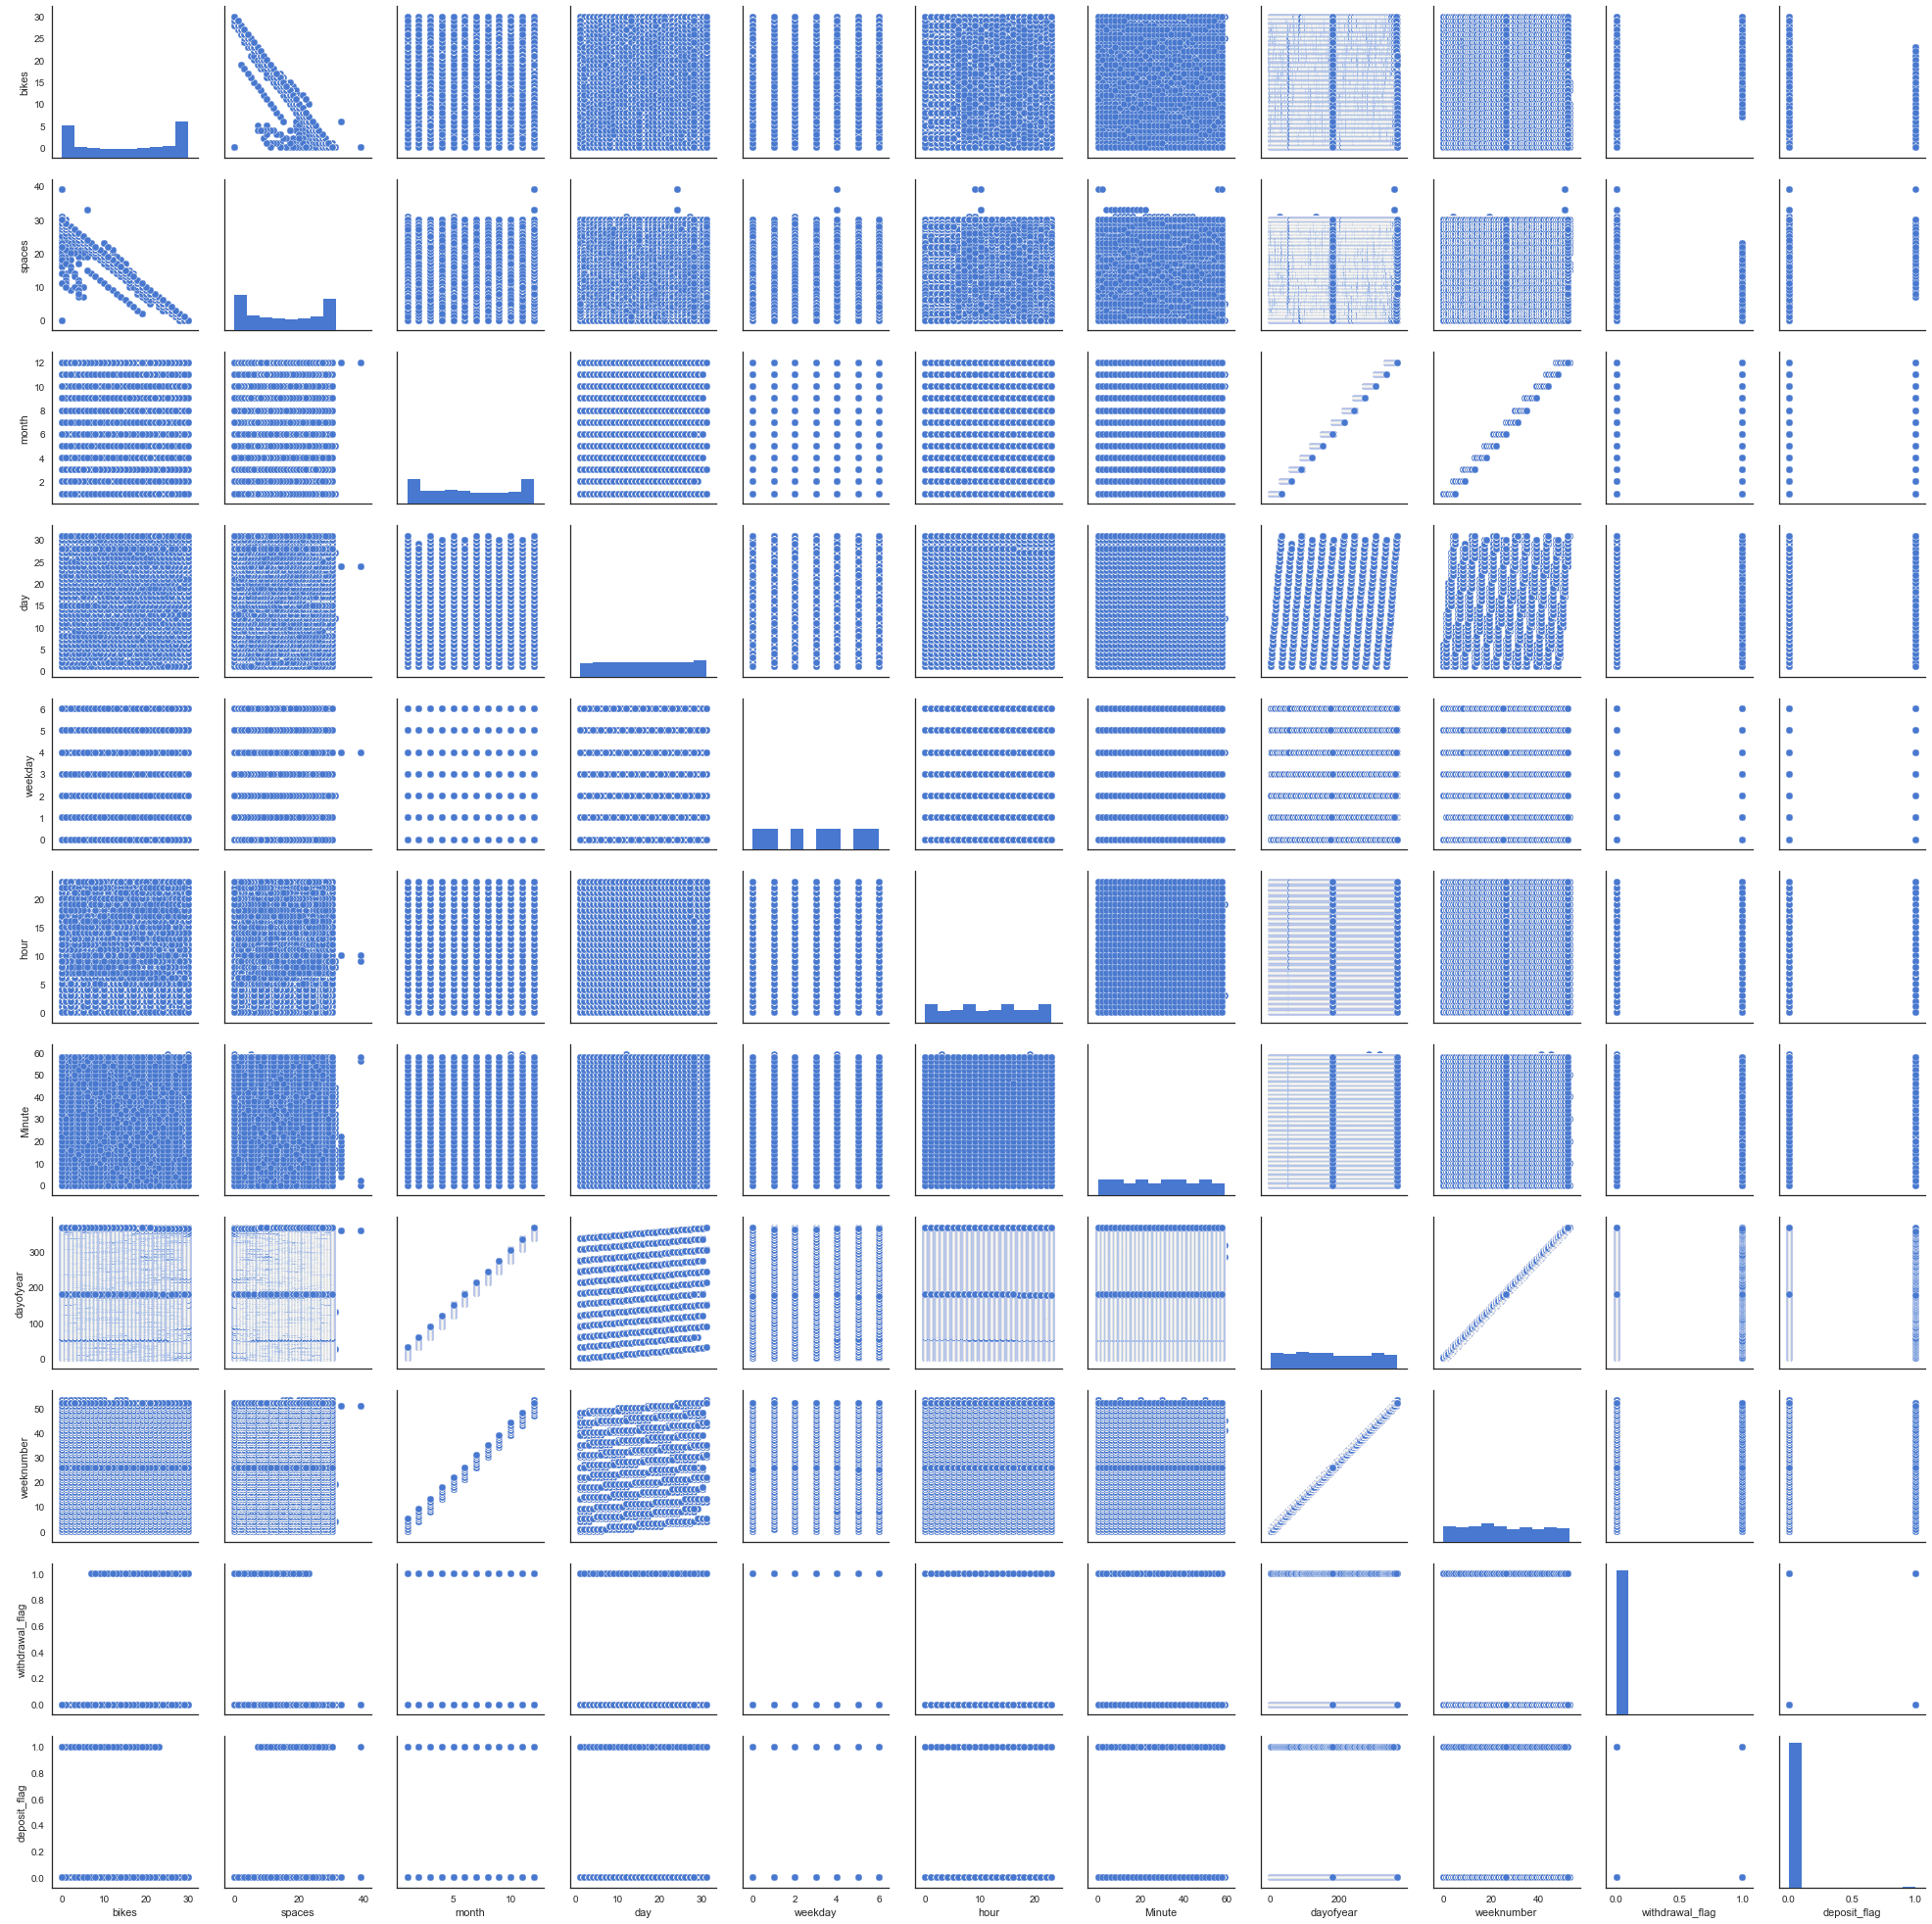

In [44]:
sns.pairplot(df2)

In [ ]:
#plt.scatter(df2['month'], df2['desposit_flag']==1)

In [80]:
x = df2['2018-06':'2018-05']

KeyError: '2018-06'

In [48]:
y = df2.loc[(df2['2018-05':'2018-06']) & df2['withdrawal_flag'] == 1]

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.range.RangeIndex'> with these indexers [2018-05] of <class 'str'>

In [49]:
plt.scatter(x, y)

NameError: name 'x' is not defined

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1136831 entries, 2011-03-02 06:20:02 to 2018-06-28 16:46:02
Data columns (total 11 columns):
bikes              1136831 non-null int64
spaces             1136831 non-null int64
month              1136831 non-null int64
day                1136831 non-null int64
weekday            1136831 non-null int64
hour               1136831 non-null int64
Minute             1136831 non-null int64
dayofyear          1136831 non-null int64
weeknumber         1136831 non-null int64
withdrawal_flag    1136831 non-null int64
deposit_flag       1136831 non-null int64
dtypes: int64(11)
memory usage: 144.1+ MB


In [61]:
df2.index

RangeIndex(start=0, stop=1136831, step=1)

In [72]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1136831 entries, 2011-03-02 06:20:02 to 2018-06-28 16:46:02
Data columns (total 11 columns):
bikes              1136831 non-null int64
spaces             1136831 non-null int64
month              1136831 non-null int64
day                1136831 non-null int64
weekday            1136831 non-null int64
hour               1136831 non-null int64
Minute             1136831 non-null int64
dayofyear          1136831 non-null int64
weeknumber         1136831 non-null int64
withdrawal_flag    1136831 non-null int64
deposit_flag       1136831 non-null int64
dtypes: int64(11)
memory usage: 144.1+ MB


In [71]:
df2['time'] = df2.index.map(lambda x: x.strftime('%H:%M'))

AttributeError: 'str' object has no attribute 'strftime'

In [90]:
df2.to_csv('features2.csv')